In [22]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas
import datetime as dt
from bokeh.resources import INLINE


In [23]:
merge_data=Path("Priya_Resources\merged_world_data.csv")

merge_data_df=pd.read_csv(merge_data)

In [24]:
#Air Quality in the Year 2021 across 166 Countries

mapplot_df=merge_data_df.copy()
mapplot_df['Air Quality']=pd.cut(mapplot_df['AQI'], bins=[1,2,3,4,5,6],\
                              labels=['Good','Fair','Moderate','Poor','Very Poor'], right=False)


In [25]:
%%capture --no-display

map_plot_country = mapplot_df.hvplot.points(
    "Longitude",
    "Latitude",
    tiles="CartoLight",
    geo = True,
    frame_width = 700,
    frame_height = 500,
    title='Air Quality in the Year 2021 across 166 Countries:',
    size = "CO₂ Emission(2021)",
    scale = 0.0005,
    color = "Air Quality",
    hover_cols=['CO₂ Emission(2021)','Country'],

)


map_plot_country

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Air Quality,CO₂ Emission(2021),Country)

In [26]:
hvplot.save(map_plot_country,"Priya_Output/map_plot_city.png",resources=INLINE)



In [27]:
co2_year=['CO₂ Emission(2000)', 'CO₂ Emission(2005)', 'CO₂ Emission(2010)', 'CO₂ Emission(2015)',\
             'CO₂ Emission(2020)', 'CO₂ Emission(2021)']
co2_avg=[]

for i,item in enumerate(co2_year):
    co2_avg.append((merge_data_df[item].mean().astype("int64")))

print(co2_avg)

[145033295, 168808980, 190512946, 203278861, 203230537, 213664115]


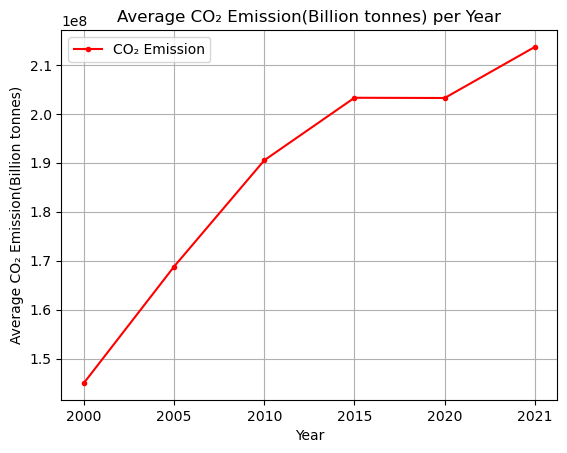

In [28]:
line_df=pd.DataFrame({'Year':['2000','2005','2010','2015','2020','2021'],
                    'CO₂ Emission':[145033295, 168808980, 190512946, 203278861, 203230537, 213664115]})

line_df['Year']=pd.to_datetime(line_df['Year'])
line_df['Year']=line_df['Year'].dt.strftime("%Y")
line_df.set_index('Year',inplace=True)
line_df.plot(style='.-',color='red')

plt.title('Average CO₂ Emission(Billion tonnes) per Year')
plt.ylabel('Average CO₂ Emission(Billion tonnes)')

plt.grid()
plt.savefig("Priya_Output/Year_Vs_co2emission.png")
plt.show()

In [29]:
air_content=['CO', 'NH3', 'NO', 'NO2', 'O3', 'PM10', 'PM2_5', 'SO2']
air_avg=[]

for i,item in enumerate(air_content):
    air_avg.append((merge_data_df[item].mean().round(2)))
air_avg.sort(reverse=True)
print(air_avg)

[444.0, 70.12, 36.8, 18.61, 8.67, 8.24, 2.91, 2.2]


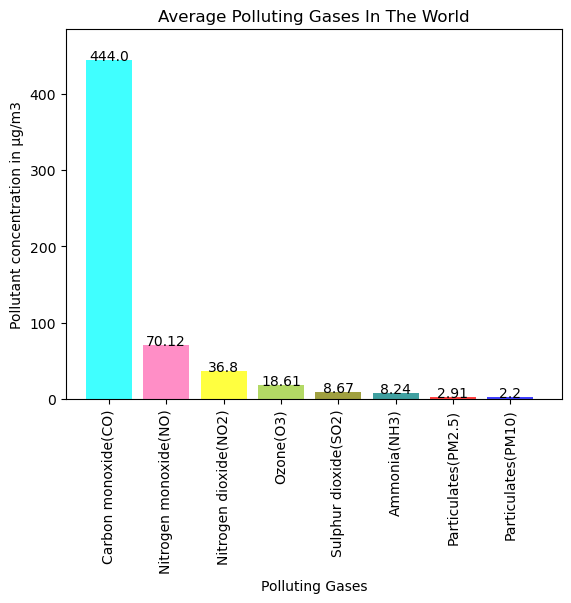

In [30]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],horizontalalignment='center')
gas_names=['Carbon monoxide(CO)','Nitrogen monoxide(NO)', 'Nitrogen dioxide(NO2)', \
           'Ozone(O3)', 'Sulphur dioxide(SO2)', 'Ammonia(NH3)', 'Particulates(PM2.5)','Particulates(PM10)']
x_axis = np.arange(0, len(air_content))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Average Polluting Gases In The World")
plt.xlabel("Polluting Gases")
plt.ylabel("Pollutant concentration in μg/m3")

plt.xlim(-0.75, len(air_content)-.100)
plt.ylim(0, max(air_avg) + 40)
addlabels(air_content, air_avg)
plt.bar(x_axis, air_avg, color=['cyan','hotpink','yellow', 'yellowgreen', 'olive', 'teal','red', 'blue'],\
        alpha=0.75, align="center")
plt.xticks(tick_locations,gas_names,rotation=90)

plt.savefig("Priya_Output/polluting-gases.png")
plt.show()